<a href="https://colab.research.google.com/github/RicardoSantos0/Reddit-Discord_exercise_in_Data_Analysis/blob/master/World_Happiness_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn.newsbook.com.mt/wp-content/uploads/2019/03/0f40cb07fbf640d883755f420e91f6ec.jpg)

# Introduction 

### Welcome
I will like to take this opportunity to thank you for taking the initiative to work on your learning. Online courses and lectures do a great job in feeding you valuable knowledge but do you actually understand? If you are the person who read through a math textbook without lifting a pen, you are not alone! People tend to assume they know something but the only way to prove it is applying. In this walkthrough I will guide you and explain it to you as much as possible. If you still have any question please message me or drop the question on discord. This is not a perfect notebook. There may be flaws or errors and I do apologise beforehand. Kindly let me know and I will fix it immediately.

### Context 
This dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness). I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy 
- freedom 
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country".  Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score. 
- Low dystopia residual = low level of happiness 
- high dystopia residual = high level of happiness.

### Understanding the column data
- Country
- Happiness rank 
- Happiness score 
 * This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10. 
- Economic (GDP per cap)
 * Extend of GDP that contributes to the happiness score
- Family
 * To what extend does family contribute to the happiness score 
- Health
 * Extend of health (life expectancy) contribute to the happiness score 
- Freedom
 * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
- Trust (Government corruption)
 * Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity 
 * Extend of generosity that contribute to happiness score 
- dystopia residual
- Year

#### Do note:
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $

## Let's get started!

In [0]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## Explanation of packages (feel free to skip if you are familiar)
### Pandas
Pandas works great on tabular (presented in tables or columns) data. These data can be merged, manipulated, reshaped and combined in just a few lines of code. 

### Numpy
Numpy works specifically on [N-dimensional arrays](https://www.w3resource.com/numpy/ndarray/index.php).  

### Matplotlib
Library for creating static, animated, and interactive visualizations in Python.
- I will describe matplotlib as a manual car.

### Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. In short, it allows you to make quick plot with just a line of code and you do not need to worry about customisation of plots (eg: working with colour palette). We will be using Seaborn for most of our plots and do feel free to use matplotlib if you are comfortable with that. I usually use matplotlib when I need to customise the plot to my flavor. 
- I will describe seaborn as an auto car.

In [3]:
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

Saving World_Happiness_2015_2017.csv to World_Happiness_2015_2017.csv


In [4]:
# After uploading the file, we are able to see the name of the file saved as "World_Happiness_2015_2017.csv"
# Use pd.read_csv() to read the file and assign it to variable call "data"
data = pd.read_csv('World_Happiness_2015_2017.csv')

# We then use data.head(10) to see the first 10 rows of data
data.head(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


### Looking into data.shape() to see rows and columns
- We should be able to see (470,11) as output. 470 represents number of rows while 11 represents number of columns.
- We then use data.dtypes to identify the type for each column. Type can come in many form: str, int, float, object, etc. 
- The main purpose for this is that we will need to change the type if we want to manipulate data. For instance if my happiness ranking is a string type, I may have issue adding things up or perform statistical analysis on it. I will need to change it to int. This can be done using pandas.DataFrame.astype(). We will change the year column from int to float in the following exercise (Reason: just for you to practise. We will change back to Int after that)


In [5]:
# Then what I do next is look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(470, 11)

In [6]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [7]:
# Now lets change the data type of Year from int to float 
data['Year'] = data['Year'].astype('float')

# Now let's check if we did it right
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [8]:
# Have a look at data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015.0


In [0]:
# Yikes! Year in decimals! Let's change it back to int!
data['Year'] = data['Year'].astype('int')

### Looking into null values. There are numerous way you can deal with null, NaN or unknown values.
- Omitting rows with null/NaN values
  * This helps our output to be more robust and accurate
  * However this should only be done when we have sufficient data. If we have more than 50% NaN values, we may not be able to omit the affected rows.
- Replace these NaN and null values with mean or median
 * This saves us the worry for loss of information
 * This does increase our data variance and bias

To identify null values, we use **data.isnull().sum()**
- isnull() returns boolean (True or False). Is this value null? Yes or No?
- sum() calculate the number of True
- For this practice I have personally picked one dataset with no null value. So you should see 0 for each column.

In [9]:
# Lets calculate the number of null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

## Next up! Plotting!
- Here, we will want to see the relationship among attributes. My favourite way to visualise that is through seaborn's pairplot.
- This can be done using sns.pairplot(). 
 * I then adjust the layout to include a title call "FacetGrid plot", with fontsize of 20. I use adjust to adjust the spacing of margin and plot. You can experiment the number to your favor.
 * Note: If you are using dark theme on google colab you may need to change to light in order to see the axis name. 

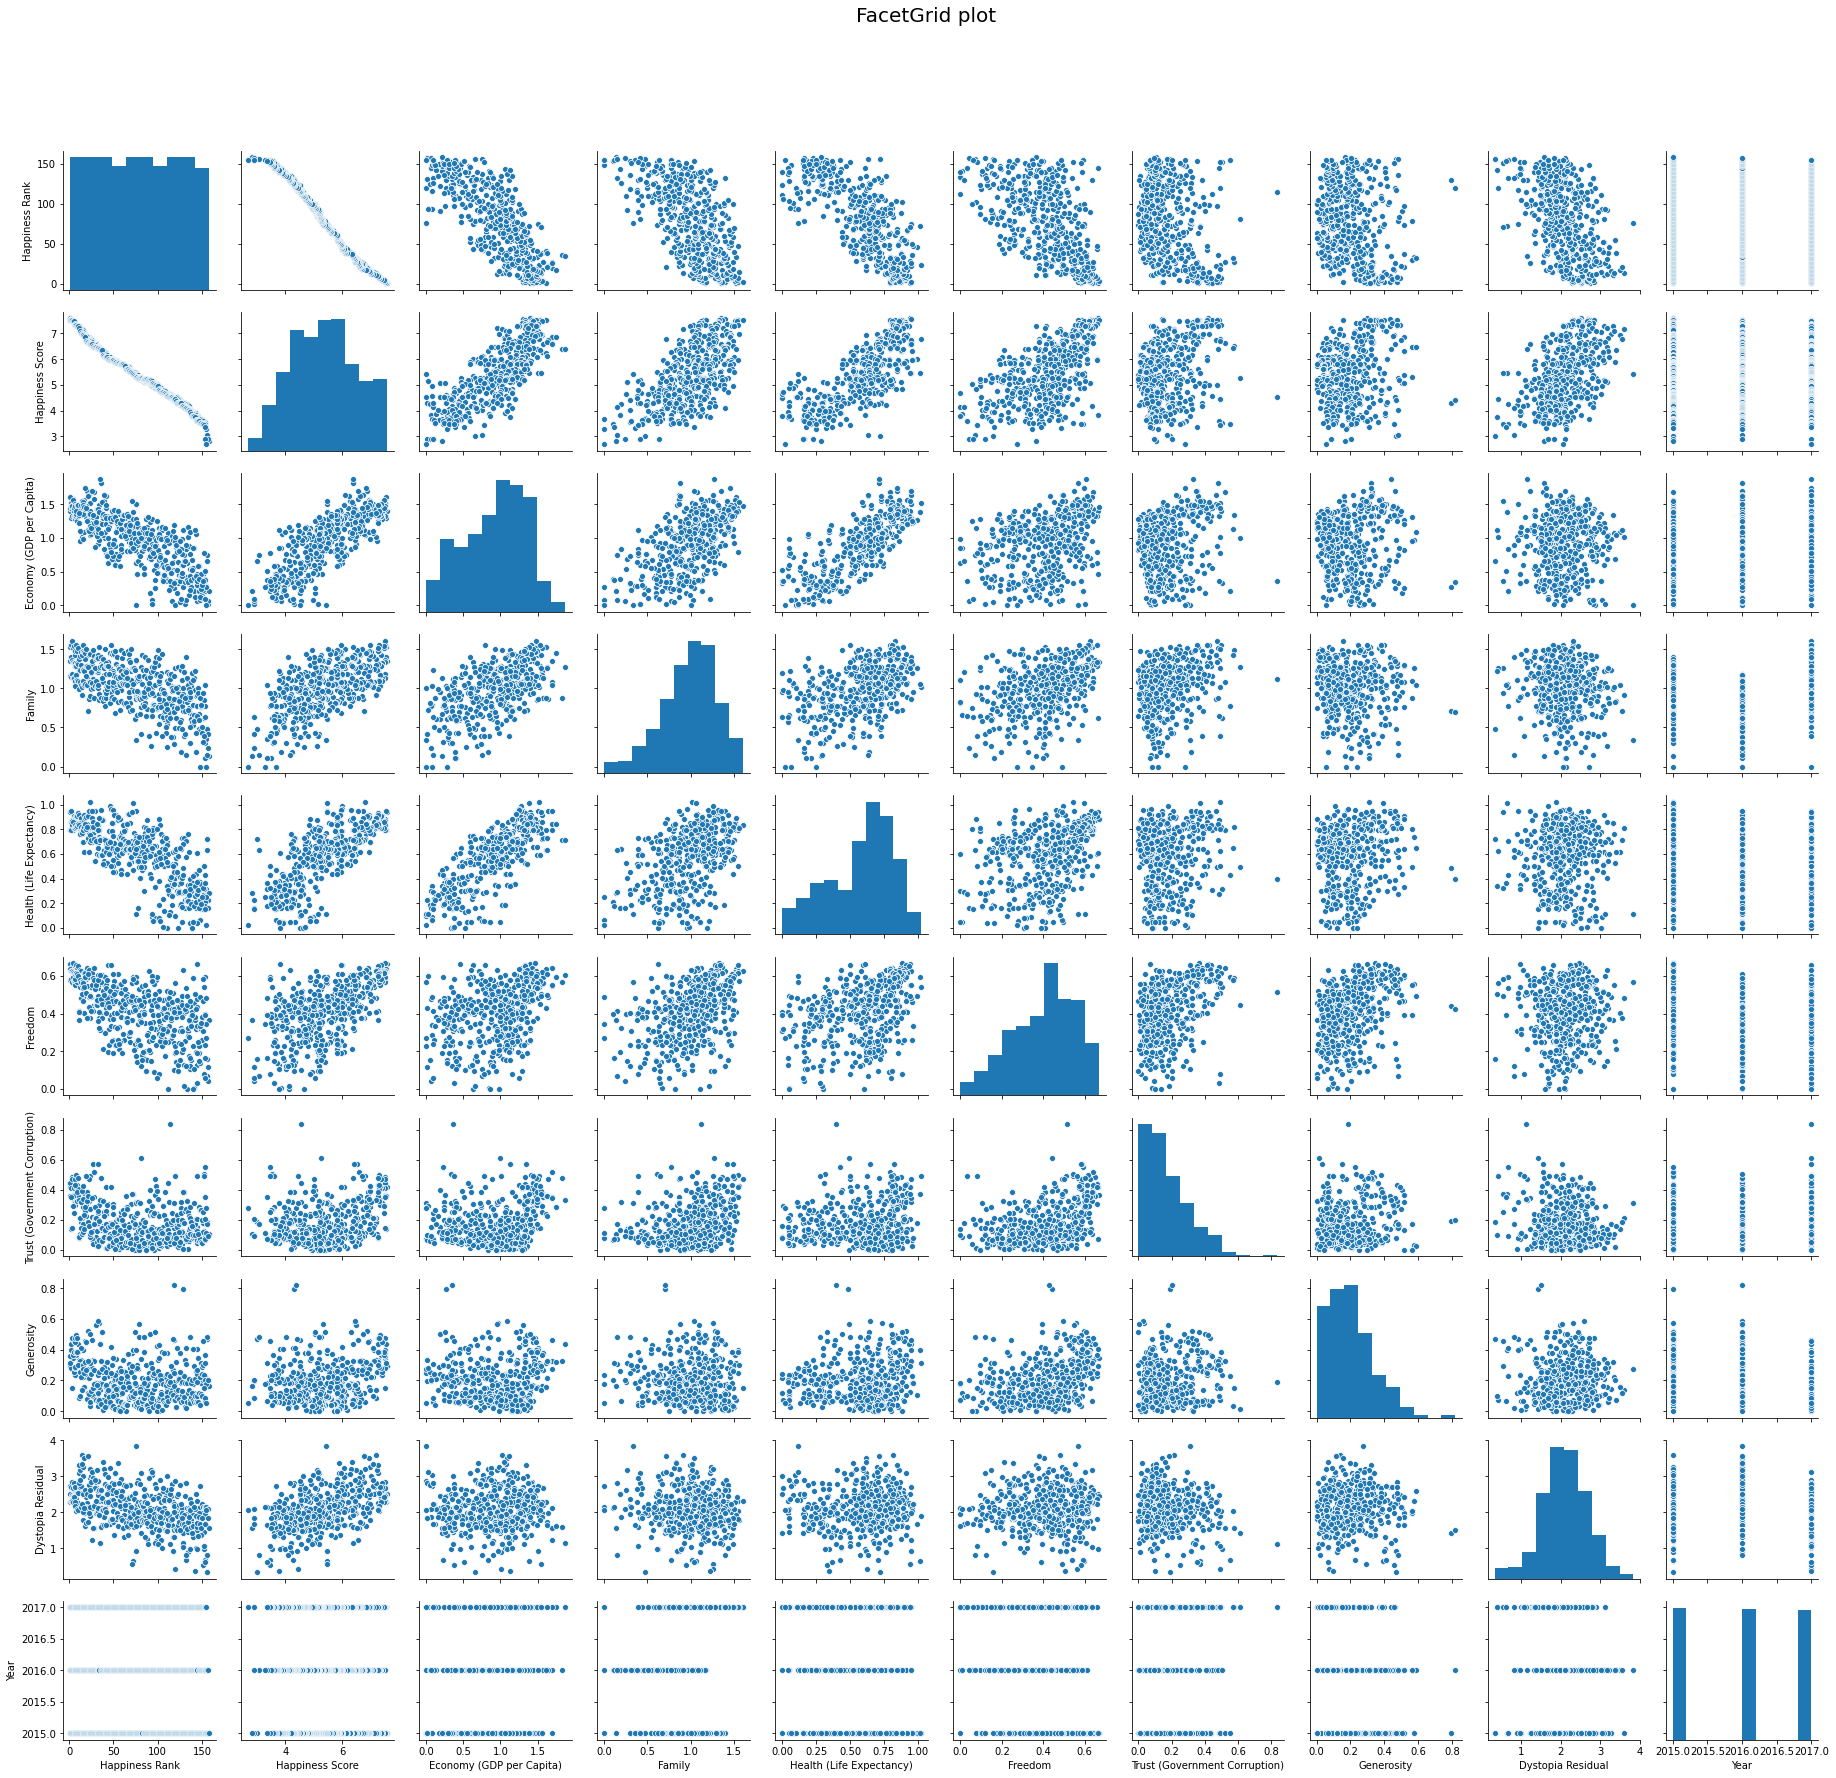

In [10]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
I need you to take 1-2 mins to just look at the plot. It's messy at first but you will get it.

We see two types of plot. 
- Histograms
 * Take some time to look at the x axis and y axis of the histogram. There are the same! This shows the distribution of each attribute.
- Scatter plot
 * This shows the relationship between 2 attributes. We can see a strong linear correlation between Happiness Rank and Happiness Score. That is because the rank is determined by the score. 

What we are interested in finding out is the correlation between happiness score and each attribute. From the plot if we look at the second column from the left (Happiness score on x-axis), we do notice that econimic, family and health have positive linear correlation. Well, the truth is what you see may be different from what others see. We need to prove it through some form of numeric values and this tutorial will be focused on that.

## Correlation between Happiness score and economic 

### What I plan to do:
- Assign the required attribute as a list and assign that to a variable
- Use .corr() to find correlation. 
 * If you look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), you will notice the default test used is pearson. Besides Pearson distribution, you get to choose between Kendall and Spearman.

### Pearson distribution
Pearson's correlation is a measure of the linear relationship between two continuous random variables. A perfect positive linear correlation will be 1. If value on x increases, value of y increases. A perfect negative correlation is -1. If X increases, Y decrease. Before we run any stats model we need to look into the assumptions.
#### Assumptions for Pearson
- Each variable needs to be continuous and not discrete. Continuous values have decimals and has a scale. Things like weight and height are continuous (10.02 KG, 1.002 cm). Decrete are fix numbers. Things like I saw 2 eggs on the table or number of visits to the doctor (1,2,3,etc). No such thing as I saw 3.42 eggs on the table or I have visited the doctor 4.3 times this year.
- Next is related pair. Related pairs refers to the pairs of variables. Each participant or observation should have a pair of values. So if the correlation was between GPA and SAT score, then each observation used should have both a GPA and a SAT value. Using this example I can only include Peter, Tom and Sam into the sample if they have both GPA and SAT score. If Sam only has GPA, I can't use Pearson.
- No outliers. Absence of outliers refers to not having outliers in either variable. Having an outlier can skew the results of the correlation by pulling the line of best fit formed by the correlation too far in one direction or another.  Typically, an outlier is defined as a value that is 3.29 standard deviations from the mean,or a standardized value of less than ±3.29.
- Linearity and homoscedasticity refer to the shape of the values formed by the scatterplot. For linearity, a “straight line” relationship between the variable should be formed.  If a line were to be drawn between all the dots going from left to right, the line should be straight and not curved. Homoscedasticity refers to the distance between the points to that straight line. The shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met. 

Credit to [S.SWAIN](https://www.researchgate.net/profile/S_Swain2) from Researchgate that did a wonderful explanation! 

For this practice, we will just work with Pearson.

In [12]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.00000,0.78545
Economy (GDP per Capita),0.78545,1.00000


## What do we see here?
- Before we interpret the result we need to ask ourselves how high should the correlation coefficient be to be significant. How close to -1 or 1? For this purpose let me introduce you to $R^2$!
- Why is $R^2$ better than R?
 * Interpretation is easy.
 * For this exercise we realise that the $R^2$ value is 0.617. This tells us that 61.7% of variation can be explained by the relationship between happiness score and Economy. 

 ![alt text](https://cdn.guff.com/site_1/media/21000/20041/items/c26faf8ac4163c7d0ceac1c8.jpg)
   * **House Party conversation: What does R = 0.785 tells you?** 
     * **You** : Ummm it's closer to 1? 
     * **Kian**: $R^2$ tells you much more info. What is the difference between R = 0.5 and R = 0.7?
     * **You**: I don't care! I am not a...
     * **Kian**: It doesn't tell you much. But the $R^2$ values for them are 0.25 and 0.49 respectively which means R = 0.7 is twice as good as R = 0.5.
     * **You**: *finding dropped jaws*

Now that I got your attention, let's move on with charting. 

Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

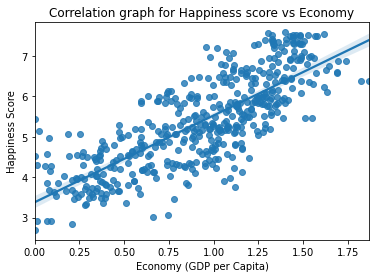

In [13]:
sns.regplot(data = econ_corr, x = 'Economy (GDP per Capita)', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Economy")

## Regression plot
For regression plot you can just use sns.regplot and input in 3 components.
1. Data
2. What to put on x axis
3. What to put on y axis

We then set a title using set_title('blah blah blah')

# Exercise for you
- I will like you to tell me the correlation coefficient (R and $R^2$) for the other 6 attributes and plot a regression plot for each of them. (Advance: Feel free to use correlation matrix)
The 6 attributes you need to work on are:
1. Family
2. Health
3. Freedom
4. Trust (Government corruption)
5. Generosity
6. Dystopia residual

- I need you to create a summary too and explain what you see. Words are important and needless to say is the key skill that will get you that job you want. 

#Summary of exercise

What makes people happy and why do some countries have happier populations than others? The answers to these questions are complicated: different individuals have different needs, ambitions and desires; they respond differently to different incentives and, in all likelihood, will report happiness (or lack of suffering) for different reasons. However, can are there trends on what people value to their happiness?

In this work, the author tries to determine what are the most accurate contributing factors to happiness. In order to achieve that, he used the Happiness Score index from 2015 to 2017 dataset. Through the use of the Pearson method, the author determined the correlation indexes between the happiness score and the explanatory variables.

In the following exercise, it is the author's assessment that, in order to be happy, people place the most value on their economic situation, their health status and their familiar relationships. On the other hand, Trust in Government and Generosity have very little contribution towards happiness. 

To summarize, according to this model, western developed societies will tend to more happy than countries in development. So, in order to be considered happier, developing nations should focus primarily on making investments that can potentiate their labor force's productivity (e.g. infrastructure investment, IoT coverage) and guaranteeing the best possible healthcare systems. By doing so, developing countries can increase their wealth and, in turn, the happiness of their population.



Let's start by creating a list that encompasses every attribute required for the analysis and imbue it with the necessary data to make the proper correlation matrix:

In [37]:
all_attributes = ['Country','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']

#create the all-encompassing dataframe 

alcorr = data[all_attributes]

#look at data, (took a while to understand that I had wrong variable names)
alcorr.head(10)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Given that we know in advance that this dataset has no null values. Thus, we will procceed directly towards the correlation matrixes for $R$ and $R^2$:

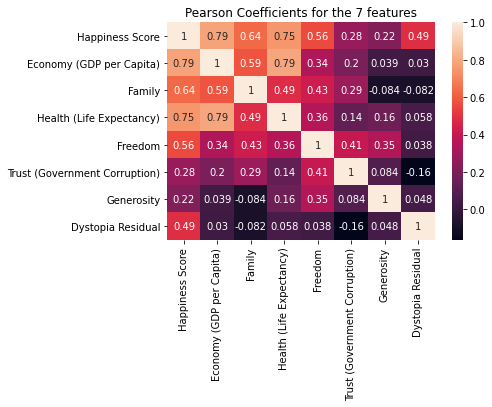

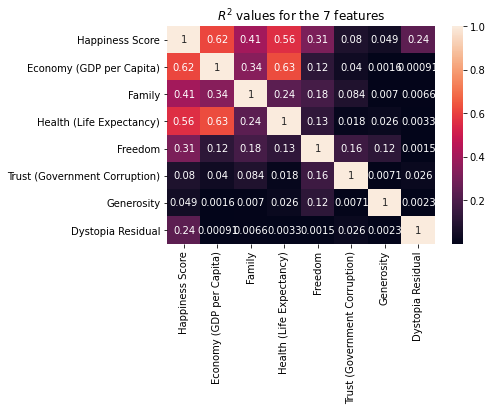

In [38]:
cor_matrix = alcorr.corr()
matrix1 = sns.heatmap(cor_matrix, annot=True)
plt.title('Pearson Coefficients for the 7 features')
plt.show()

square_matrix = cor_matrix **2
matrix2 = sns.heatmap(square_matrix, annot=True)
plt.title('$R^2$ values for the 7 features')
plt.show()

#What do we get from here?

Considering this dataset it becomes clear that the Economy and Health are the most relevant inputs towards the Happiness Score. On the other end of the spectrum, Trust in Government and Generosity are the lowest correlated inputs. In truth, these observations seem fairly self-evident: 

1.   From a simply utilitaristic perspective, more wealth allows the purchase of more goods and services which, in theory, translate to more happiness. In general, countries with higher GDP per capita tend to lead to happier societies and the data reflects that.

2. Health is also an important variable towards Hapiness. Life expectancy is an important indicator to measure the overall quality of a country's health system. In countries with robust health systems, people tend to be less concerned with the fear of succumbing to ilness. This allows individual to be hopefull about their future well-being.


It should be noted, however, that health is also reasonably correlated with economic status. This indicates that, when it comes to happiness, there is significant colinearity between the Economy and Health. This observation opens the door for different interpretations: First, developed countries tend to provide healthcare with higher quality because they state-of-the-art equipment and more qualified professionals. Secondly, healthier individuals are able to be in the workforce for longer which translates into higher potential earnings. However, this may also highlight that health's contribution for one's happiness is heavily reliant on economic status which could mean that access to healthcare depends on one's ability to afford it. 

Regardless, we can proceed with plotting:


Text(0.5, 1.0, 'Correlation graph for Economy vs Happiness')

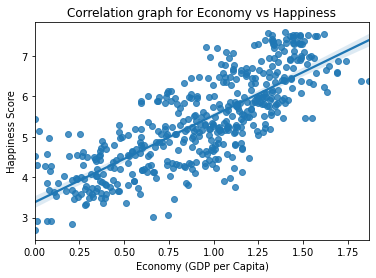

In [43]:
#i tried to use a for function on this part, but i failed miserably, not sure if it's possible, since I failed I went on to  make graphs one on one.
#for value in alcorr:
 # sns.regplot(data = alcorr, x = value, y = 'Hapiness Score').set_title('Correlation graph for', value, 'vs Happiness Score') 
  #Regression plots


sns.regplot(data = alcorr, x ='Economy (GDP per Capita)', y = 'Happiness Score').set_title("Correlation graph for Economy vs Happiness")





Text(0.5, 1.0, 'Correlation graph for Health vs Happiness')

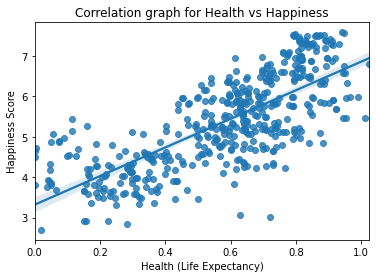

In [44]:
sns.regplot(data = alcorr, x = 'Health (Life Expectancy)', y = 'Happiness Score').set_title("Correlation graph for Health vs Happiness")




Text(0.5, 1.0, 'Correlation graph for Family vs Happiness')

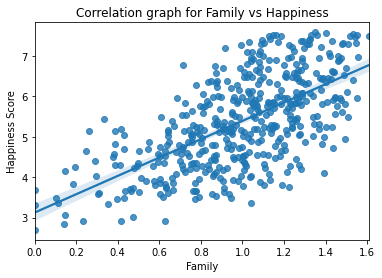

In [45]:
sns.regplot(data = alcorr, x = 'Family', y = 'Happiness Score').set_title("Correlation graph for Family vs Happiness")



Text(0.5, 1.0, 'Correlation graph for Freedom vs Happiness')

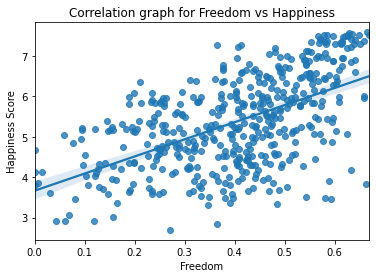

In [50]:
sns.regplot(data = alcorr, x = 'Freedom', y = 'Happiness Score').set_title("Correlation graph for Freedom vs Happiness")



Text(0.5, 1.0, 'Correlation graph for Trust score vs Happiness')

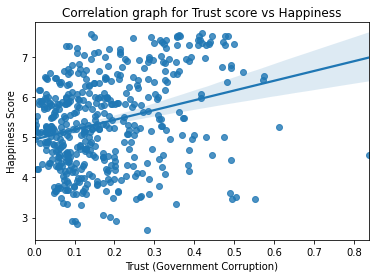

In [47]:
sns.regplot(data = alcorr, x = 'Trust (Government Corruption)', y = 'Happiness Score').set_title("Correlation graph for Trust score vs Happiness")



Text(0.5, 1.0, 'Correlation graph for Generosity vs Happiness')

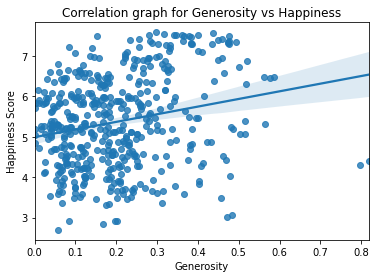

In [48]:
sns.regplot(data = alcorr, x = 'Generosity', y = 'Happiness Score').set_title("Correlation graph for Generosity vs Happiness")



Text(0.5, 1.0, 'Correlation graph between Unexplained events vs Happiness')

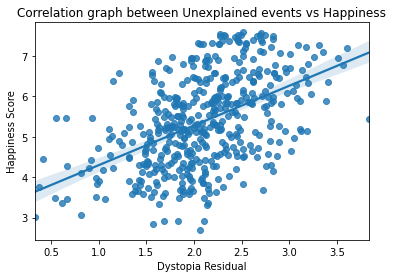

In [49]:
sns.regplot(data = alcorr, x = 'Dystopia Residual', y = 'Happiness Score').set_title("Correlation graph between Unexplained events vs Happiness")

The next figure displays how all of these relations appear in a single graph

Text(0.5, 1.0, 'Correlation graph between all variables vs Happiness')

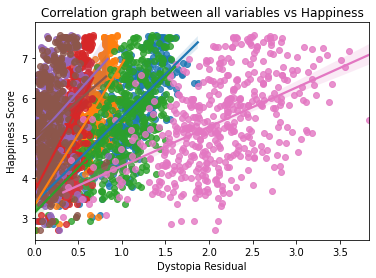

In [58]:
#Still missing a legend and extending the graph, haven't realized the best way to do so

sns.regplot(data = alcorr, x ='Economy (GDP per Capita)', y = 'Happiness Score')
sns.regplot(data = alcorr, x = 'Health (Life Expectancy)', y = 'Happiness Score') 
sns.regplot(data = alcorr, x = 'Family', y = 'Happiness Score', label = 'Family')
sns.regplot(data = alcorr, x = 'Freedom', y = 'Happiness Score', label = 'Freedom')
sns.regplot(data = alcorr, x = 'Trust (Government Corruption)', y = 'Happiness Score') 
sns.regplot(data = alcorr, x = 'Generosity', y = 'Happiness Score')
sns.regplot(data = alcorr, x = 'Dystopia Residual', y = 'Happiness Score').set_title("Correlation graph between all variables vs Happiness")



In short, linear plotting corroborated with the findings presented on the correlation matrixes. 